# Chapter-3: Create netCDF for gridded data with Xarray

`xarray` is a powerful Python package to handle **N-dimensional arrays**. Compared to numpy's ndarray, one clear advance of xarray is named / indexed dimensions and coordinates. In xarray you can easily create and write CF compliant netCDF files, as well as conduct data analysis and visualization. In this chapter, we will show the procedure of creating a CF compliant netCDF with xarray by means of an example of gridded data.

## Get Started with Xarray

In [1]:
# Import standard packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Xarray is conventionally imported as 'xr'
import xarray as xr
from datetime import timedelta, datetime
from cftime import date2num
from pyproj import Proj
import cartopy as cp
import cartopy.crs as ccrs

Xarray provides two core data structures:

* **DataArray** is a labeled N-dimensional array.
* **Dataset** is a container of one or more DataArray objects with shared dimensions.

When we read a netCDF file with xarray, we usually read it as a Dataset (as shown in the code chunks below). `xarray.Dataset` have four key properties:
* `Dimensions`: a dictionary containing pairs of dimension name and the number of coordinates on that dimension.
* `Coordinates`: are `xarray.DataArrays` representing the coordinate variables and eventually the auxiliary coordinate variables.
* `Data Variables`: are `xarray.DataArrays` representing the data variables; sometimes auxiliary coordinate variables are also placed under this component.
* `Attributes`: a dictionary that holds global attributes.

In [2]:
# Read netCDF as a xarray.Dataset
ds = xr.open_dataset(
    "/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/tos_O1_2001-2002.nc"
)
ds

<xarray.Dataset> Size: 3MB
Dimensions:    (lon: 180, bnds: 2, lat: 170, time: 24)
Coordinates:
  * lon        (lon) float64 1kB 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat        (lat) float64 1kB -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time       (time) object 192B 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 3kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    time_bnds  (time, bnds) object 384B ...
    tos        (time, lat, lon) float32 3MB ...
Attributes: (12/13)
    title:          IPSL  model output prepared for IPCC Fourth Assessment SR...
    institution:    IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:         IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96...
    contact:        Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id:     IPCC Fourth Assessment
    table_id:       Table O1 (13 November 2004)
    ...             ...
    realization:    1
    cmor_version:   0.96
    Conventions:    CF-1.0
    history:        YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed...
    references:     Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment:        Test drive

In [3]:
# Get the dimensions of the netCDF file
ds.dims

FrozenMappingWarningOnValuesAccess({'lon': 180, 'bnds': 2, 'lat': 170, 'time': 24})

In [4]:
# Get all coordinate variables in the netCDF file
print(ds.coords)

# Get all data variables in the netCDF file
print(ds.data_vars)

Coordinates:
  * lon      (lon) float64 1kB 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat      (lat) float64 1kB -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 192B 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Data variables:
    lon_bnds   (lon, bnds) float64 3kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    time_bnds  (time, bnds) object 384B ...
    tos        (time, lat, lon) float32 3MB ...


In [5]:
# Get a specific coordinate variable by its name; 
# Each coordinate variable is a xarray.DataArray Object, AND of course one-dimensional (!see previous chapter).
ds.time

<xarray.DataArray 'time' (time: 24)> Size: 192B
array([cftime.Datetime360Day(2001, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 3, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 5, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 7, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 8, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2001, 12, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 3, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 5, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 7, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 8, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2002, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 192B 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Attributes:
    standard_name:   time
    long_name:       time
    axis:            T
    bounds:          time_bnds
    original_units:  seconds since 2001-1-1

In [6]:
# Get a specific data variable by its name;
# Each data variable is a xarray.DataArray Object, and is usually a multi-dimensional array.
ds['tos']

<xarray.DataArray 'tos' (time: 24, lat: 170, lon: 180)> Size: 3MB
[734400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1kB 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat      (lat) float64 1kB -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 192B 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Attributes:
    standard_name:   sea_surface_temperature
    long_name:       Sea Surface Temperature
    units:           K
    cell_methods:    time: mean (interval: 30 minutes)
    original_name:   sosstsst
    original_units:  degC
    history:          At   16:37:23 on 01/11/2005: CMOR altered the data in t...

```{note}
The syntax to get a specific coordinate / data variable can be either `Dataset.<variable-name>` or `Dataset['variable-name']`, both syntaxes are valid.
```

In [7]:
# Get all attributes of a specific variable.
ds.tos.attrs

{'standard_name': 'sea_surface_temperature',
 'long_name': 'Sea Surface Temperature',
 'units': 'K',
 'cell_methods': 'time: mean (interval: 30 minutes)',
 'original_name': 'sosstsst',
 'original_units': 'degC',
 'history': ' At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;'}

In [8]:
# Get a specific variable attribute.
ds.tos.attrs['units']

'K'

In [9]:
# Get the global attributes of the whole dataset
ds.attrs

{'title': 'IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment',
 'institution': 'IPSL (Institut Pierre Simon Laplace, Paris, France)',
 'source': 'IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v',
 'contact': 'Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr',
 'project_id': 'IPCC Fourth Assessment',
 'table_id': 'Table O1 (13 November 2004)',
 'experiment_id': 'SRES A2 experiment',
 'realization': 1,
 'cmor_version': 0.96,
 'Conventions': 'CF-1.0',
 'history': 'YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements',
 'references': 'Dufresne et al, Journal of Climate, 2015, vol XX, p 136',
 'comment': 'Test drive'}

```{note}
More information concerning the use of xarray package is available in the [Xarray documentation](https://docs.xarray.dev/en/stable/index.html).
```

## Create a netCDF file from gridded data on a curvilinear grid

The procedure to create a netCDF file by means of xarray can be described in the following steps:

1. Create coordinate variables
2. Create data variables
3. Create a `xarray.Dataset` object containing dimensions, coordinate and data variables, and attributes.
4. Alternatively, attributes can also be added after the Dataset object was created.
5. Use `<Dataset>.to_netcdf()` to **write the Dataset to a netCDF file**.

In our example we assume:

* random air temperature data on different pressure levels
* "NorthPolarStereographic" projection

### 1. Create Coordinate Variables

We will create `x`, `y`, `pressure`, and `time` as coordinate variables.

In [10]:
# 300-km spacing in x and y
x = np.arange(-2500, 2500, 300)
y = np.arange(-4500, -1200, 300)

print("X coordinates are: ", x)
print("Y coordinates are: ", y)

X coordinates are:  [-2500 -2200 -1900 -1600 -1300 -1000  -700  -400  -100   200   500   800
  1100  1400  1700  2000  2300]
Y coordinates are:  [-4500 -4200 -3900 -3600 -3300 -3000 -2700 -2400 -2100 -1800 -1500]


In [11]:
# Make coordinate variable of pressure levels in hPa
press = np.array([1000, 925, 850, 700, 500, 300, 250])

In [12]:
# Set start time to 22 o'clock of today's date
start = datetime.now().replace(hour=22, minute=0, second=0, microsecond=0)
# Make coordinate variable of time
times = np.array([start + timedelta(hours=h) for h in range(13)])
print("The time steps are: ", times)

# Set the time unit.
# Remember that the CF compliant form of time unit is [time-interval] since YYYY-MM-DD hh:mm:ss
time_units = f"hours since {times[0]:%Y-%m-%d 00:00}"
print("The unit of time variable is: ", time_units)

# Transfer the datatime objects to numerical values relative to the defined time unit
time_vals = date2num(times, time_units)
print("The actual time coordinates are: ", time_vals)

The time steps are:  [datetime.datetime(2024, 10, 15, 22, 0)
 datetime.datetime(2024, 10, 15, 23, 0)
 datetime.datetime(2024, 10, 16, 0, 0)
 datetime.datetime(2024, 10, 16, 1, 0)
 datetime.datetime(2024, 10, 16, 2, 0)
 datetime.datetime(2024, 10, 16, 3, 0)
 datetime.datetime(2024, 10, 16, 4, 0)
 datetime.datetime(2024, 10, 16, 5, 0)
 datetime.datetime(2024, 10, 16, 6, 0)
 datetime.datetime(2024, 10, 16, 7, 0)
 datetime.datetime(2024, 10, 16, 8, 0)
 datetime.datetime(2024, 10, 16, 9, 0)
 datetime.datetime(2024, 10, 16, 10, 0)]
The unit of time variable is:  hours since 2024-10-15 00:00
The actual time coordinates are:  [22 23 24 25 26 27 28 29 30 31 32 33 34]


#### Create Auxiliary Coordinate Variables

We will add longitude and latitude as auxiliary coordinate variables. The lat and lon are calculated  by means of the package `pyproj` based on the coordinate variables `x` and `y`.

In [13]:
X, Y = np.meshgrid(x, y)
lcc = Proj({
    'proj': 'stere', # stereographic projection
    'lon_0': 0, # longitude of a self-defined start point
    'lat_0': 90, # latitude of a self-defined start point
    'lat_ts': 90 # the latitude where scale is not distorted
})
lon, lat = lcc(X*1000, Y*1000, inverse=True)

print("The geographical extent of the grid is:", lat.min(), lat.max(), lon.min(), lon.max())

The geographical extent of the grid is: 46.105536306599156 76.59958922561316 -59.03624346792648 56.88865803962798


### 2. Create Data Variable

We will create random values as the content of the temperature data variable.

In [14]:
# Create data variable of temperature
# The shape of this N-dimensional array have to match the pre-defined dimensions
temps = 272 + np.random.randn(times.size, press.size, y.size, x.size)
print("The generated lowest temperature value is ", temps.min(), ", and the maximal value is ", temps.max()) 
print("The shape of the N-dimensional array for temperature is: ", temps.shape)

The generated lowest temperature value is  268.2871990689956 , and the maximal value is  276.1703937244566
The shape of the N-dimensional array for temperature is:  (13, 7, 11, 17)


### 3. Create a Dataset Object in xarray

In the `xarray.Dataset` constructor, we have to provide dimensions, coordinates and variables, (optionally attributes).

* The coordinates `time`, `press`, `y`, `x`, and the auxiliary coordinates `lat` and `lon` are keys in the dictionary **coords**.
* The data variable `temperature` is the key of the dictionary **data_vars**.
* The dimension name(s) are given as the first entry of the dictionary value tuple.
* The actual data arrays are provided as the second entry of the dictionary value tuple.
* Optionally, the attributes can be provided as the third entry of the dictionary value tuple.

Here is a summary of the syntax for using the Dataset constructor:

```{code}
xr.Dataset(
    coords = {
        "coordinate-variable-name": (["dimension"], <dataType>(coordinates), {'variable-attribute':'content'})
    },
    data_vars = {
        "data-variable-name": (["dimension-1", "dimension-2", ...], <dataType(data)>, {'variable-attribute':'content'})
    },
    attrs = {"attribute-name": <content>,
             "attribute-name": <content>}
)
```

In [15]:
# Create a xarray Dataset
ds = xr.Dataset(
    coords={
        "x": (["x"], np.float32(x), {"units": "km"}),
        "y": (["y"], np.float32(y), {"units": "km"}),
        "pressure": (["pressure"], np.float32(press), {"units": "hPa"}),
        "time": (["time"], np.int32(time_vals), {"units": time_units}),
        "lat": (["y", "x"], np.float64(lat)),
        "lon": (["y", "x"], np.float64(lon)),
    },
    data_vars={
        "Temperature": (
            ["time", "pressure", "y", "x"],
            np.float32(temps),
            {"units": "Kelvin"})
        },
    attrs={
        "Conventions": "CF-1.11"
        },
)
ds

<xarray.Dataset> Size: 71kB
Dimensions:      (time: 13, pressure: 7, y: 11, x: 17)
Coordinates:
  * x            (x) float32 68B -2.5e+03 -2.2e+03 -1.9e+03 ... 2e+03 2.3e+03
  * y            (y) float32 44B -4.5e+03 -4.2e+03 ... -1.8e+03 -1.5e+03
  * pressure     (pressure) float32 28B 1e+03 925.0 850.0 ... 500.0 300.0 250.0
  * time         (time) int32 52B 22 23 24 25 26 27 28 29 30 31 32 33 34
    lat          (y, x) float64 1kB 46.11 47.18 48.16 49.01 ... 69.9 67.89 65.77
    lon          (y, x) float64 1kB -29.05 -26.05 -22.89 ... 48.58 53.13 56.89
Data variables:
    Temperature  (time, pressure, y, x) float32 68kB 272.6 271.7 ... 271.9 272.5
Attributes:
    Conventions:  CF-1.11

### 4. Add Attributes

We will add more attributes to variables as well as the entire dataset. Besides, we are gonna add another variable to the dataset for the projection.

In [16]:
# Add further attributes to coordinate variables
ds.time.attrs["axis"] = "T"
ds.time.attrs["standard_name"] = "time"
ds.time.attrs["long_name"] = "time"

ds.x.attrs["axis"] = "X"
ds.x.attrs["standard_name"] = "projection_x_coordinate"
ds.x.attrs["long_name"] = "x-coordinate in projected coordinate system"

ds["y"].attrs["axis"] = "Y"
ds["y"].attrs["standard_name"] = "projection_y_coordinate"
ds["y"].attrs["long_name"] = "y-coordinate in projected coordinate system"

ds["pressure"].attrs["axis"] = "Z"
ds["pressure"].attrs["standard_name"] = "air_pressure"
ds["pressure"].attrs["positive"] = "down"

# Add Attributes to Auxiliary Coordinate Variables
ds.lat.attrs["units"] = "degrees_north"
ds.lat.attrs["standard_name"] = "latitude"
ds.lat.attrs["long_name"] = "latitude coordinate"

ds.lon.attrs["units"] = "degrees_east"
ds.lon.attrs["standard_name"] = "longitude"
ds.lon.attrs["long_name"] = "longitude coordinate"

# Add Attributes to the Data Variable: Temperature
ds.Temperature.attrs["standard_name"] = "air_temperature"
ds.Temperature.attrs["long_name"] = "Forecast air temperature"
ds.Temperature.attrs["_FillValue"] = -9999.0
ds.Temperature.attrs["coordinates"] = "lon lat"

# Add more Global Attributes
ds.attrs["title"] = "air temperature data in the arctic region"
ds.attrs["institution"] = "ICDC, Uni Hamburg"
ds.attrs["description"] = (
    "random air temperature data at different pressure levels in polar stereographic projection"
)

In [17]:
# Add Coordinate System Information
# The grid_mapping_names are listed in the documentation of the CF Conventions at:
# http://cfconventions.org/cf-conventions/cf-conventions.html#appendix-grid-mappings
ds["polarstereographic_projection"] = np.int32()
ds.polarstereographic_projection.attrs["grid_mapping_name"] = "polar_stereographic"
ds.polarstereographic_projection.attrs["latitude_of_projection_origin"] = 90.0
ds.polarstereographic_projection.attrs["longitude_of_central_meridian"] = 0.0
ds.polarstereographic_projection.attrs["scale_factor_at_projection_origin"] = 1.0

ds.Temperature.attrs["grid_mapping"] = "polarstereographic_projection"

In [18]:
ds.info()

xarray.Dataset {
dimensions:
	time = 13 ;
	pressure = 7 ;
	y = 11 ;
	x = 17 ;

variables:
	float32 Temperature(time, pressure, y, x) ;
		Temperature:units = Kelvin ;
		Temperature:standard_name = air_temperature ;
		Temperature:long_name = Forecast air temperature ;
		Temperature:_FillValue = -9999.0 ;
		Temperature:coordinates = lon lat ;
		Temperature:grid_mapping = polarstereographic_projection ;
	float32 x(x) ;
		x:units = km ;
		x:axis = X ;
		x:standard_name = projection_x_coordinate ;
		x:long_name = x-coordinate in projected coordinate system ;
	float32 y(y) ;
		y:units = km ;
		y:axis = Y ;
		y:standard_name = projection_y_coordinate ;
		y:long_name = y-coordinate in projected coordinate system ;
	float32 pressure(pressure) ;
		pressure:units = hPa ;
		pressure:axis = Z ;
		pressure:standard_name = air_pressure ;
		pressure:positive = down ;
	int32 time(time) ;
		time:units = hours since 2024-10-15 00:00 ;
		time:axis = T ;
		time:standard_name = time ;
		time:long_name = time

### 5. Write Xarray to netCDF

In [19]:
# Write the Dataset to a netCDF file
ds.to_netcdf("/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/grid_data_example.nc")

/Users/icdc/Documents/NFDI/Kemeng/myenv/venvNetcdf/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


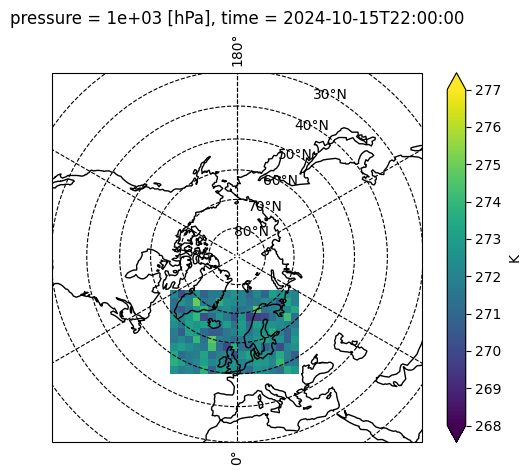

In [20]:
# Visualize the generated netCDF.
dsplot = xr.open_dataset(
    "/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/grid_data_example.nc"
)
ax = plt.axes(
    projection=ccrs.NorthPolarStereo(central_longitude=0, true_scale_latitude=90)
)
ax.set_extent([0, 360, 30, 90], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(color="k", linestyle="dashed", draw_labels=True)
dsplot["x"] = dsplot.x * 1000
dsplot["y"] = dsplot.y * 1000
p = dsplot.Temperature[0, 0, :, :].plot.pcolormesh(
    ax=ax,
    vmin=268,
    vmax=277,
    add_colorbar=False,
    transform=ccrs.NorthPolarStereo(central_longitude=0, true_scale_latitude=90),
)
cbar = plt.colorbar(p, orientation="vertical", label="K", extend="both")

/Users/icdc/Documents/NFDI/Kemeng/myenv/venvNetcdf/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


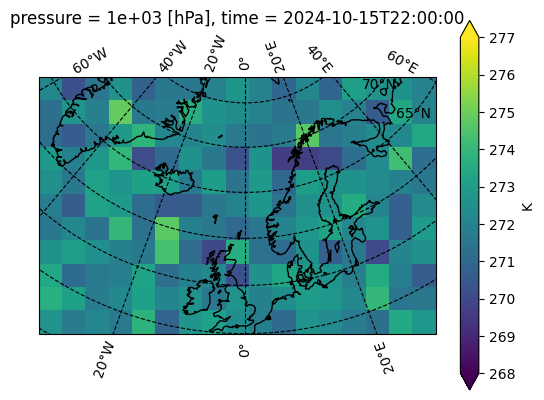

In [21]:
# Zoomed-in view of the data
ax = plt.axes(
    projection=ccrs.NorthPolarStereo(central_longitude=0, true_scale_latitude=90)
)
ax.coastlines()
ax.gridlines(color="k", linestyle="dashed", draw_labels=True)
p = dsplot.Temperature[0, 0, :, :].plot.pcolormesh(
    ax=ax,
    vmin=268,
    vmax=277,
    add_colorbar=False,
    transform=ccrs.NorthPolarStereo(central_longitude=0, true_scale_latitude=90),
)
cbar = plt.colorbar(p, orientation="vertical", label="K", extend="both")

Since data analysis and visualization with xarray is not an object of this course, so we won't delve deeper into it. In this chapter, we went through the procedure of creating netCDF with xarray for gridded data. In the next chapters, we will delve deeper into the other type of data, the discrete geometry samples (DSG), and elaborate on the procedure of creating standard netCDF file for variable DSG types.